# Exploratory Data Analysis <a class="anchor"><a id='PVA'></a></b><br>
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

In [ ]:
#!pip install plotly

In [14]:
#import sqlite3
#import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency

In [15]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

# 1. Deep Exploration

**Initial Analysis**

To kick off our deep exploration, we’ll use the `data.info()` command to get an overview of the dataset. This command provides essential information, including the number of entries, column names, non-null counts, and data types for each variable. This quick summary will allow us to identify any missing values, spot potential data type issues, and gain a high-level understanding of the dataset's structure, setting the stage for further analysis.



In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

**To visualize and get a sense of the data**

To begin familiarizing ourselves with the dataset, we’ll use the `data.head()` command, which displays the first few rows of the data. This preview allows us to quickly see the contents, spot-check variable values, and gain an initial sense of the data's structure and content. By viewing these rows, we can start to assess the data format, variable types, and any immediate patterns or issues that stand out.


In [17]:
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


**Check data types of our variables**

In this step, we’ll use the `data.dtypes` command to examine the data types of each variable in our dataset. This overview will confirm if the variables are appropriately typed (e.g., integers, floats, objects) and will help us spot any inconsistencies or unexpected types that might require adjustment. Understanding the data types at this stage is crucial, as it guides us in selecting suitable preprocessing and analysis techniques for each variable.


In [18]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

Since we don't agree with the fact that the variables in question (last_promo, payment_method and customer_region) are of type object we will change them to category in order to facilitate future analysis:

In [19]:
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')

We will divide the variables into lists for categorical and numerical variables to facilitate future interactions:

In [20]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [21]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

# 2. Summary of Important Statistics

In this section, we’ll start by generating a statistical summary using the `data.describe()` command. This summary provides key descriptive statistics for each numerical variable, such as the mean, standard deviation, minimum, and maximum values. By reviewing these statistics, we can understand the central tendencies, dispersion, and overall range of our data. 

Following this, we’ll delve into more detailed analyses, including frequency distributions for categorical variables, box plots, and histograms, each accompanied by summary boxes with key metrics. Together, these statistics and visualizations give us a comprehensive view of the data, setting a foundation for more advanced analyses.



In [22]:
data.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


Sendo assim podemos verificar que algumas variáveis tem outliers

Para isso iremos fazer uma função para identificar quantos outliers temos:

In [23]:
def detect_outliers_summary(df, columns):
    outliers_data = []

    numeric_columns = df[columns].select_dtypes(include=['number']).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        
        outliers_data.append({'Coluna': col, 'Número de Outliers': outlier_count})
    
    outliers_summary = pd.DataFrame(outliers_data)
    return outliers_summary

outliers_summary_table = detect_outliers_summary(data, number_var)
print(outliers_summary_table)

                      Coluna  Número de Outliers
0               customer_age                1083
1               vendor_count                1524
2              product_count                2371
3                   is_chain                3155
4                first_order                   0
5                 last_order                   0
6               CUI_American                3511
7                  CUI_Asian                3475
8              CUI_Beverages                5435
9                   CUI_Cafe                1366
10        CUI_Chicken Dishes                3248
11               CUI_Chinese                3522
12              CUI_Desserts                2016
13               CUI_Healthy                2169
14                CUI_Indian                3448
15               CUI_Italian                6448
16              CUI_Japanese                6301
17         CUI_Noodle Dishes                2226
18                 CUI_OTHER                7041
19  CUI_Street Food 

Como podemos verificar existem bastantes outliers, coisa que mais para a frente iremos tratar.

For numerical variables, the statistics above are very effective, but for categorical variables we must count the frequency of each value

**Frequency of each value in Categorical Variables**

To gain insights into the distribution of categorical variables, we will compute the frequency of each unique value in these columns. By understanding the frequency of categories, we can identify dominant categories, assess data balance, and detect potential issues such as sparse categories or outliers that may affect our analysis.


In [24]:
for column in category_var:
    frequency_percentage = data[column].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Value': frequency_percentage.index, 'Percentage': frequency_percentage.values})

    print(f"\033[1mColumn '{column}'\033[0m:")
    print(result)
    print("\n") 

Column 'customer_region':
  Value  Percentage
0  8670   30.610261
1  4660   29.948570
2  2360   27.687531
3  2440    4.650652
4  4140    2.687531
5  8370    1.552308
6  2490    1.395509
7     -    1.386101
8  8550    0.081535


Column 'last_promo':
      Value  Percentage
0         -   52.521325
1  DELIVERY   19.712745
2  DISCOUNT   14.099348
3   FREEBIE   13.666583


Column 'payment_method':
  Value  Percentage
0  CARD   63.224410
1  DIGI   19.132589
2  CASH   17.643001




**Now for a better visualization of the data and their respective statistics, let's plot some graphs:**

**2.1 Box-Plot**

Box plots allow us to visualize the spread, central tendency, and range of values for each variable. For each variable, we will generate a box plot that includes a summary box indicating the average value, median, minimum, and maximum values. This helps us identify any skewness, outliers, or unusual patterns in the data, which are essential for informed data preprocessing and decision-making in our data mining process.


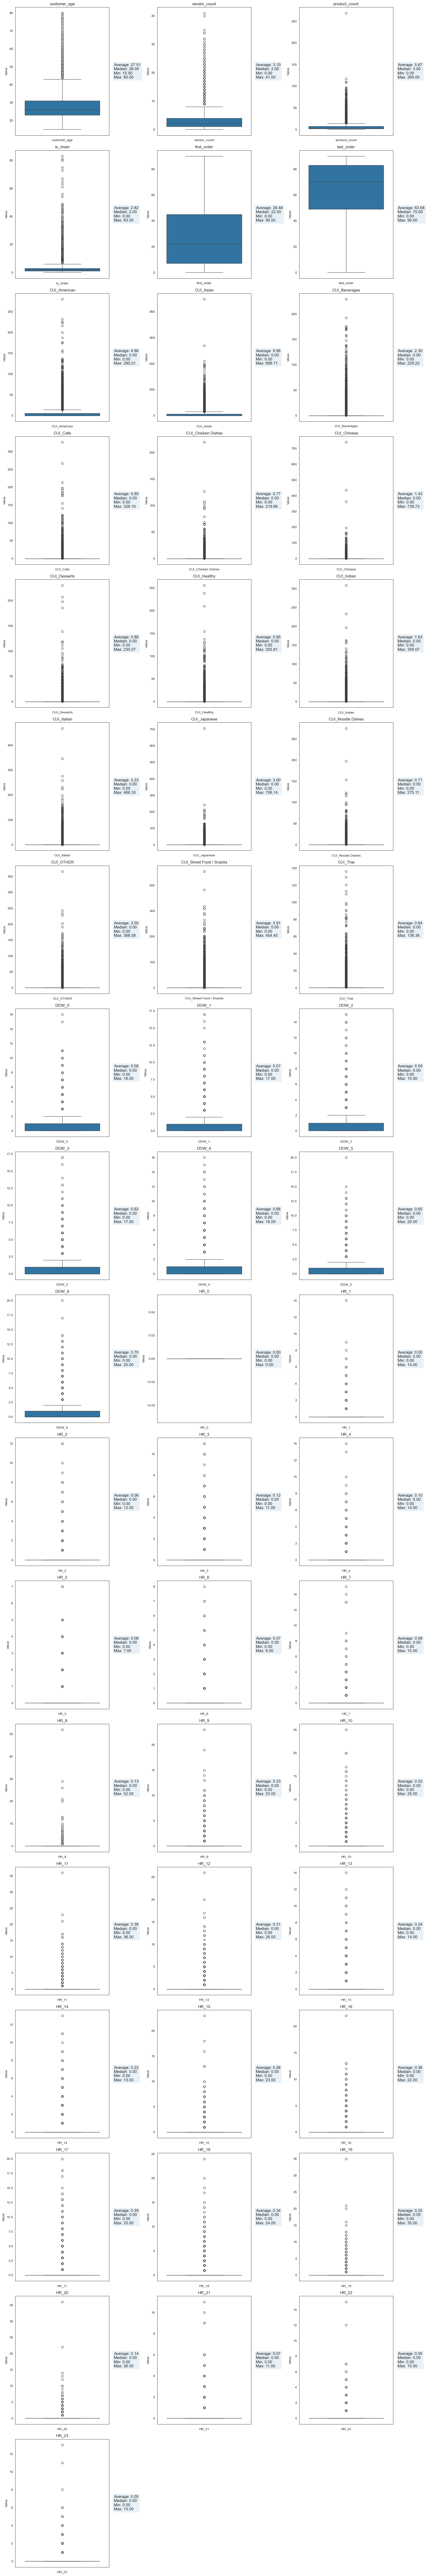

In [25]:
sns.set_style("white")

numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

n_cols = 3

n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

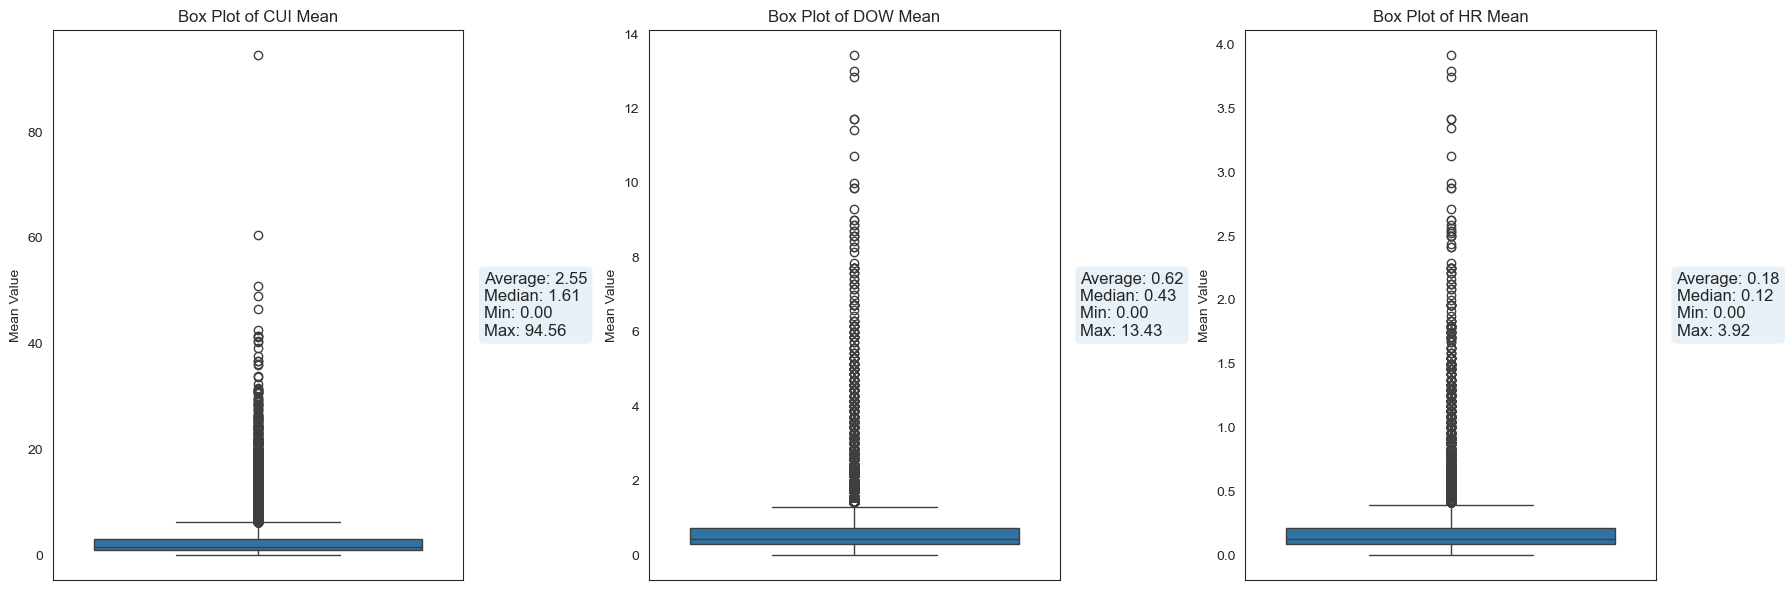

In [26]:
# Define the variable groups based on dataset column names
cui_vars = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 
    'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

dow_vars = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

hr_vars = [
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 
    'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
    'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 
    'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'
]

# Calculating the mean for each row within the CUI, DOW, and HR groups to create three distinct box plots with stats displayed.

# Calculate the mean for each group
cui_mean = data[cui_vars].mean(axis=1)  # Mean of all CUI variables per row
dow_mean = data[dow_vars].mean(axis=1)  # Mean of all DOW variables per row
hr_mean = data[hr_vars].mean(axis=1)    # Mean of all HR variables per row

# Prepare the data for box plots by creating a DataFrame with these mean values
aggregated_means = pd.DataFrame({
    "CUI Mean": cui_mean,
    "DOW Mean": dow_mean,
    "HR Mean": hr_mean
})

# Plotting each group's aggregated mean in separate box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List to iterate through for each plot
mean_vars = ["CUI Mean", "DOW Mean", "HR Mean"]

for i, col in enumerate(mean_vars):
    # Box plot for each aggregated mean
    sns.boxplot(y=aggregated_means[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_ylabel("Mean Value")
    
    # Calculate statistics for each mean variable
    mean_value = aggregated_means[col].mean()
    median_value = aggregated_means[col].median()
    min_value = aggregated_means[col].min()
    max_value = aggregated_means[col].max()
    
    # Display statistics on each plot
    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                 fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.show()

**2.2 Histrogram**

Histograms provide a visual representation of the distribution of values for each variable. For each variable, we will create a histogram along with a summary box that displays the average value, median, minimum, and maximum values. These histograms help us understand the frequency distribution and shape (e.g., normal, skewed) of each variable, offering insights that will guide us in selecting appropriate analytical methods.


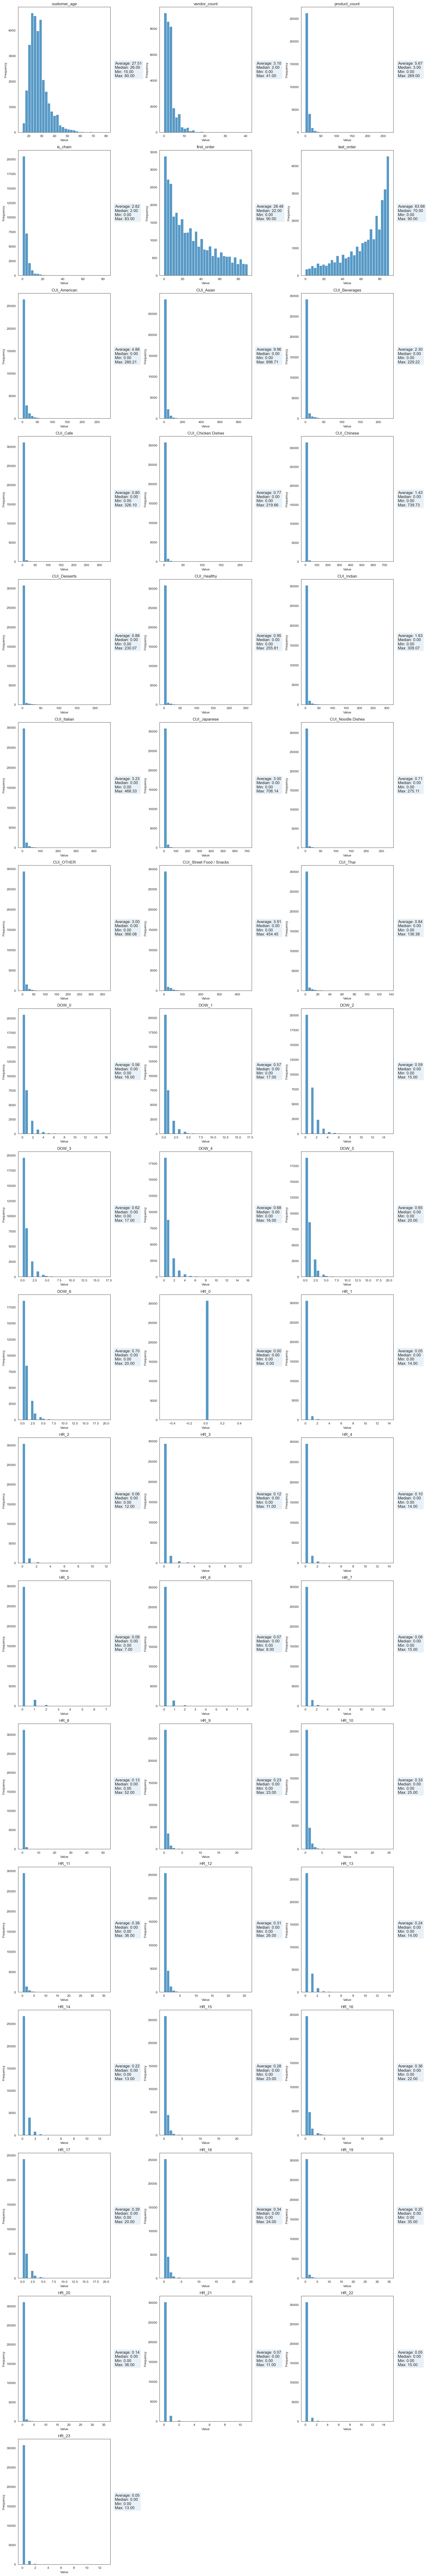

In [27]:
sns.set_style("white")

numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

n_cols = 3

n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], stat='count') 
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. Identify Trends, Patterns, or Anomalies
In this chapter, our objective is to uncover underlying trends, patterns, and anomalies within the data. By systematically analyzing these elements, we can detect recurring behaviors, identify correlations, and highlight unusual values or outliers that might impact our analysis. Understanding these factors is essential in a data mining project, as they often reveal deeper insights and influence the accuracy of predictive models. This analysis will inform our feature engineering choices and guide us toward meaningful data transformations, ultimately enhancing the value and interpretability of our results.


### 3.1 Anomalies

In this section, we focus on detecting anomalies within our dataset. Anomalies, or outliers, are values that deviate significantly from the majority of observations and may indicate data entry errors, rare events, or unique patterns. Identifying these values early on is crucial, as they can impact model performance and lead to misleading insights if not handled properly.


When we open the dataset, we notice that there are missing values and hyphen values, because there are blank values and others with only “-”. We need to correct this:

In [28]:
missing_values = data.isnull().sum()
hyphen_counts = (data == '-').sum()

total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100
hyphen_percentage = (hyphen_counts / total_rows) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Hyphen Values': hyphen_counts,
    'Missing %': missing_percentage,
    'Hyphen %': hyphen_percentage
})

missing_summary

,Missing Values,Hyphen Values,Missing %,Hyphen %
customer_id,0,0,0.000000,0.000000
customer_region,0,442,0.000000,1.386101
customer_age,727,0,2.279854,0.000000
vendor_count,0,0,0.000000,0.000000
product_count,0,0,0.000000,0.000000
is_chain,0,0,0.000000,0.000000
first_order,106,0,0.332413,0.000000
last_order,0,0,0.000000,0.000000
last_promo,0,16748,0.000000,52.521325
payment_method,0,0,0.000000,0.000000


In [29]:
# Filtrar as linhas onde first_order é ausente e last_order é diferente de 0
missing_first_order = data[data['first_order'].isnull() & (data['last_order'] != 0)]

# Verificar se existe alguma linha com essa condição e exibir o resultado
if not missing_first_order.empty:
    print("Linhas onde 'first_order' é missing e 'last_order' é diferente de 0:")
    print(missing_first_order)
else:
    print("Não existem linhas onde 'first_order' é missing e 'last_order' é diferente de 0.")

Não existem linhas onde 'first_order' é missing e 'last_order' é diferente de 0.


In [30]:
data["HR_0"].unique()

array([ 0., nan])

Futuramente iremos tratar dos missing values e dos hyphen values

*Relativamente à coluna customer_region, entendemos que os hyphen values presentes podem representar valores desconhecidos, por isso, iremos trocar os hyphen values para "Missing"*

*Relativamente à coluna customer_age, entendemos que os missing values presentes representam que a idade não foi informada pelo cliente, por isso, iremos utilizar uma decision tree para dar input a valores ausentes*

*Relativamente à coluna first_order, entendemos que os missing values presentes representam 0 pois sempre que isso acontece, o last_order também é 0*

*Relativamente à coluna last_promo, verificamos que existe mais de 50% dos valores com hyphen, o que nos deixa a pensar se dropamos a coluna ou não. Caso não o façamos, iremos trocar esses hyphen values por "No promo"*

*Relativamente à coluna HR_0, entendemos que como existem 0 values e NaN values, os NaN significam falta de informação, e como os 0 values não são relevantes para a nossa análise, dropamos a coluna em questão*

In [31]:
data.drop(columns=['HR_0'], inplace=True)

if 'HR_0' in number_var:
    number_var.remove('HR_0')

We need to verify if there are several lines with the same customer_id

In [32]:
first_column = data.columns[0] 
duplicates = data[data.duplicated(subset=[first_column], keep=False)] 

print(f"Repeats values in '{first_column}' column:")
print(duplicates[[first_column]].drop_duplicates()) 
print(f"\nTotal duplicates in '{first_column}' are {duplicates.shape[0]}")

Repeats values in 'customer_id' column:
      customer_id
3355   b55012ee1c
7867   24251eb7da
16227  671bf0c738
20855  742ca068fc
24328  df91183978
24822  6bbf5f74cd
25792  8aa9bbc147
27514  cf563a0a98
27653  201a13a34d
28706  06018a56be
29922  fac7984c0d
30402  b8e7a643a4
31639  cc08ef25ce

Total duplicates in 'customer_id' are 26


We will check whether the repeated rows with the same id have exactly the same values in the other variables or not

In [33]:
target_id = ["742ca068fc","b55012ee1c","24251eb7da","671bf0c738","df91183978","6bbf5f74cd","8aa9bbc147","cf563a0a98","201a13a34d","06018a56be","fac7984c0d","b8e7a643a4","cc08ef25ce"]

matching_rows = data[data[data.columns[0]].isin(target_id)]

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", None) 

matching_rows

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can see that the 26 lines with the repeated id are exactly the same in all the variables. So let's get rid of these repeated lines and keep just one:

In [34]:
data = data.drop_duplicates(subset=[first_column], keep='first')

data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 Correlation

In this section, we examine the correlations between variables to identify relationships and dependencies within the dataset. By analyzing these correlations, we can detect variables that move together, uncover potential redundancies, and gain insights into which variables may have the most predictive power. This step is essential for refining our feature selection and improving model accuracy.


**Correlation table between Numeric Variables**

In [35]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5 or abs(correlation_matrix.iloc[i, j]) < -0.5: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.827602
1,is_chain,vendor_count,0.762893
2,is_chain,product_count,0.827070
3,DOW_0,vendor_count,0.583675
4,DOW_0,product_count,0.664808
5,DOW_0,is_chain,0.608491
6,DOW_1,vendor_count,0.581889
7,DOW_1,product_count,0.673647
8,DOW_1,is_chain,0.611351
9,DOW_2,vendor_count,0.584081


**Heatmaps**

Since there are quite a few numerical variables, we'll divide them into groups so that the heatmap isn't overloaded with unreadable information

**Heatmap of Demographic variables**

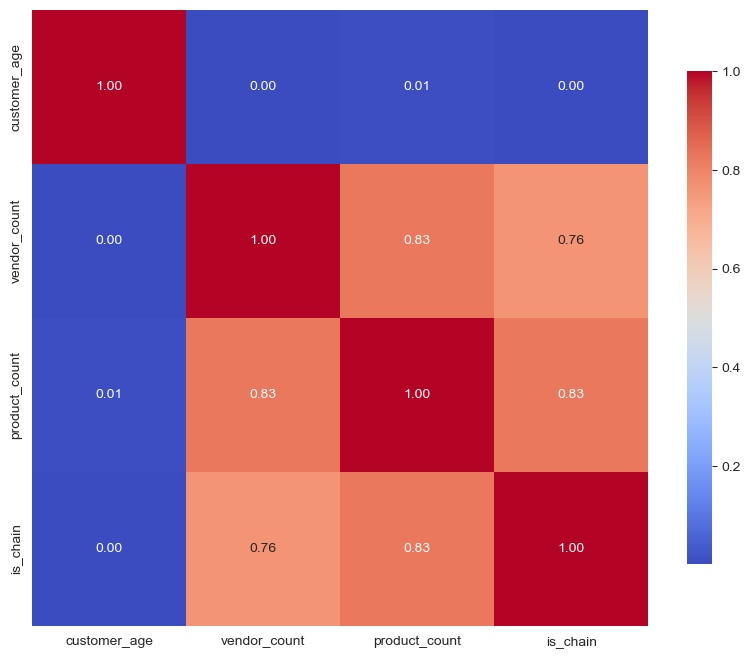

In [36]:
demographic_vars = ['customer_age', 'vendor_count', 'product_count', 'is_chain']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[demographic_vars].loc[demographic_vars], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

Podemos verificar que existe uma grande corralação entre product_count e vender_count (0.83), o que pode significar que quantos mais numeros de produtos o costumer encomendou, maior será o numero de vendedores, o que faz total sentido.

is_chain tambem tem grande correlação com vender_count e product_count, sendo que pode indiciar que quando é chain tem mais vendedores e produtos vendidos ao cliente.

**Heatmap of HR variables**

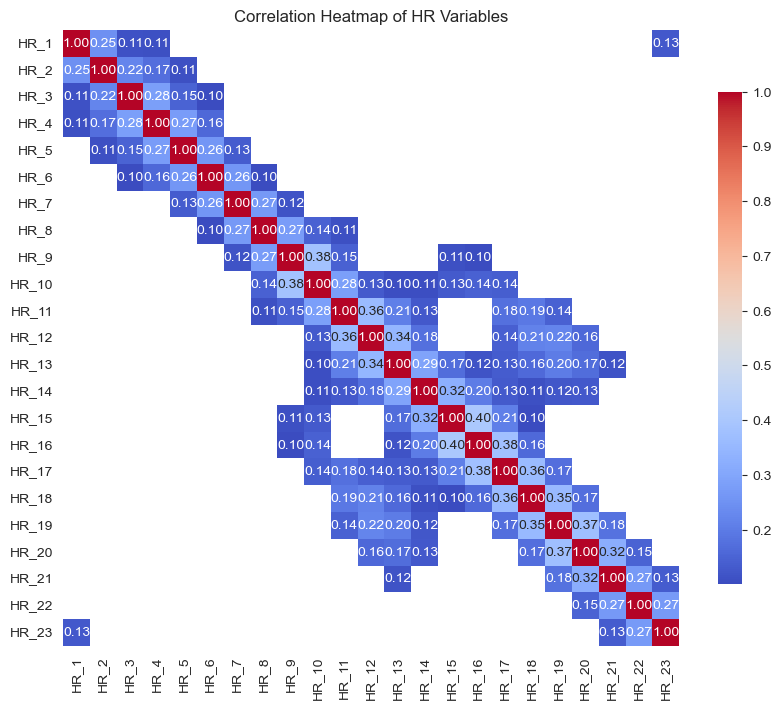

In [53]:
# List of hourly variables
hr_vars = [
    'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 
    'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
    'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 
    'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'
]

# Calculate the correlation matrix for HR variables
hr_correlation_matrix = data[hr_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hr_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=hr_correlation_matrix < 0.1, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of HR Variables")
plt.show()

Este heatmap mostra que maior parte das horas não tem grande correlção entre si, nao havendo uma correlação forte entre nenhuma das colunas (>0.5). Mas podemos verificar que entre entre HR_15 e HR_16 existe uma correlação de 0.4 o que pode indicar que quando há encomendas numa hora pode vir a haver na outra também.

**Heatmap of CUI Foods and the Days of the Week**

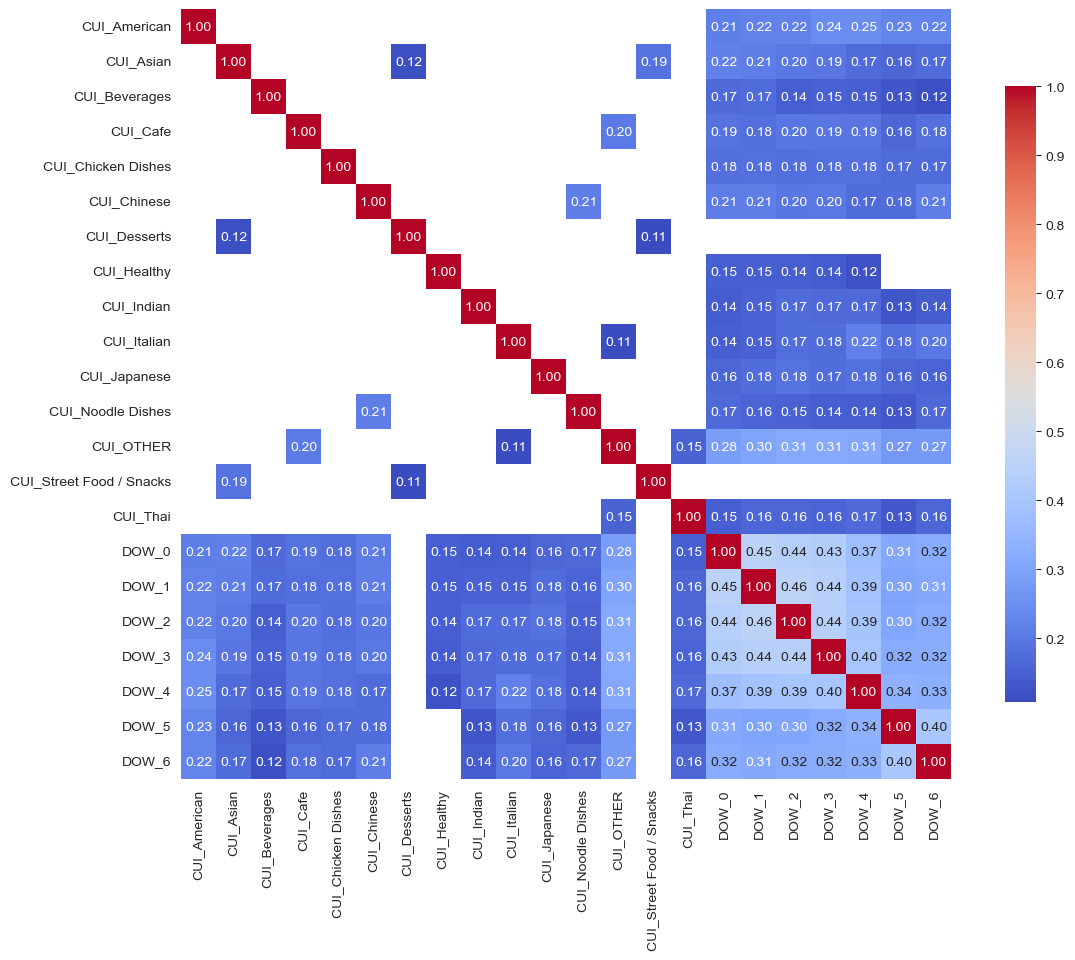

In [40]:
food_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 
    'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

day_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

selected_columns = food_columns + day_columns
correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=correlation_matrix < 0.1, square=True, cbar_kws={"shrink": .8})
plt.show()

Neste heatmap podemos verificar que não existe uma grande correlação entre comidas e as horas mas é de destacar alguns valores a cima de 0.4 entre features de dias da semana o que pode indiciar que quando por exemplo, há uma encomenda domingo, pode haver uma na segunda feira sendo esta correlação de 0.45. Não são correlações super fortes mas podem querer dizer algo e ser bastante importante para insights valiosos

**Correlation between categorical variables**

**Chi-Squared**

In [41]:
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

In [42]:
combinations = [
    ("customer_region", "last_promo"),
    ("customer_region", "payment_method"),
    ("last_promo", "payment_method")
]

results = []
for var1, var2 in combinations:
    chi2_value, p_value = chi2_test(var1, var2)
    results.append({"Variable 1": var1, "Variable 2": var2, "Chi-Squared": chi2_value, "p-value": p_value})

resultss = pd.DataFrame(results)
resultss

,Variable 1,Variable 2,Chi-Squared,p-value
0,customer_region,last_promo,309.213978,2.329313e-51
1,customer_region,payment_method,153.842715,1.362107e-24
2,last_promo,payment_method,526.562126,1.590726e-110


*It is important to note that the p-value should be low, as there is sufficient evidence to reject the null hypothesis!*

# 4. Create New Features

In this chapter, we focus on creating new features to enhance the dataset’s predictive power and capture more meaningful patterns. By engineering features based on existing variables, we can reveal hidden relationships, improve model performance, and better address our project objectives. This process is a key step in preparing our data for analysis, enabling us to extract deeper insights from the data.


**1) Age Category**

In [ ]:
# Age Category
def age_group(age):
    if age < 18:
        return "Young"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

data["age_category"] = data["customer_age"].apply(age_group)

In [44]:
# Time between first purchase and last purchase
data["days_between_first_last_purchase"] = data["last_order"] - data["first_order"]

In [45]:
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,age_category,days_between_first_last_purchase
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,Adult,1.0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Young,1.0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult,1.0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Senior,2.0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,2.0


**2) Order Frequency Per Customer**

In [48]:
# Calculate the total number of orders per customer
order_frequency = data.groupby('customer_id').size().reset_index(name='order_frequency')
print("Order Frequency Per Customer:\n", order_frequency.head())

Order Frequency Per Customer:
   customer_id  order_frequency
0      791320                1
1    31062744                1
2    41297859                1
3    52780172                1
4    70762364                1


**3) Average Order Value**

In [49]:
# Assuming 'product_count' is a proxy for order value
average_order_value = data.groupby('customer_id')['product_count'].mean().reset_index(name='average_order_value')
print("\nAverage Order Value Per Customer:\n", average_order_value.head())


Average Order Value Per Customer:
   customer_id  average_order_value
0      791320                  2.0
1    31062744                  3.0
2    41297859                  8.0
3    52780172                  3.0
4    70762364                  5.0


**4) High-Engagement Customer Flag**

In [51]:
# Calculate average values for order frequency and average order value
avg_order_frequency = order_frequency['order_frequency'].mean()
avg_order_value = average_order_value['average_order_value'].mean()

# Merge order frequency and average order value data
customer_engagement = order_frequency.merge(average_order_value, on='customer_id')

# Flag high-engagement customers
customer_engagement['high_engagement_flag'] = (
    (customer_engagement['order_frequency'] > avg_order_frequency) | 
    (customer_engagement['average_order_value'] > avg_order_value)
)

print("\nCustomer Engagement with High-Engagement Flag:\n", customer_engagement)


Customer Engagement with High-Engagement Flag:
       customer_id  order_frequency  average_order_value  high_engagement_flag
0          791320                1                  2.0                 False
1        31062744                1                  3.0                 False
2        41297859                1                  8.0                  True
3        52780172                1                  3.0                 False
4        70762364                1                  5.0                 False
...           ...              ...                  ...                   ...
31870  fffab78408                1                  1.0                 False
31871  fffb29d966                1                  5.0                 False
31872  fffc07f827                1                 18.0                  True
31873  ffff8f38f5                1                  4.0                 False
31874  ffffa3cd1a                1                  8.0                  True

[31875 rows x 

# 5. Deep Analysis (Trends, Patterns and Anomalies)

**5.1. Analysis of Identified Trends**

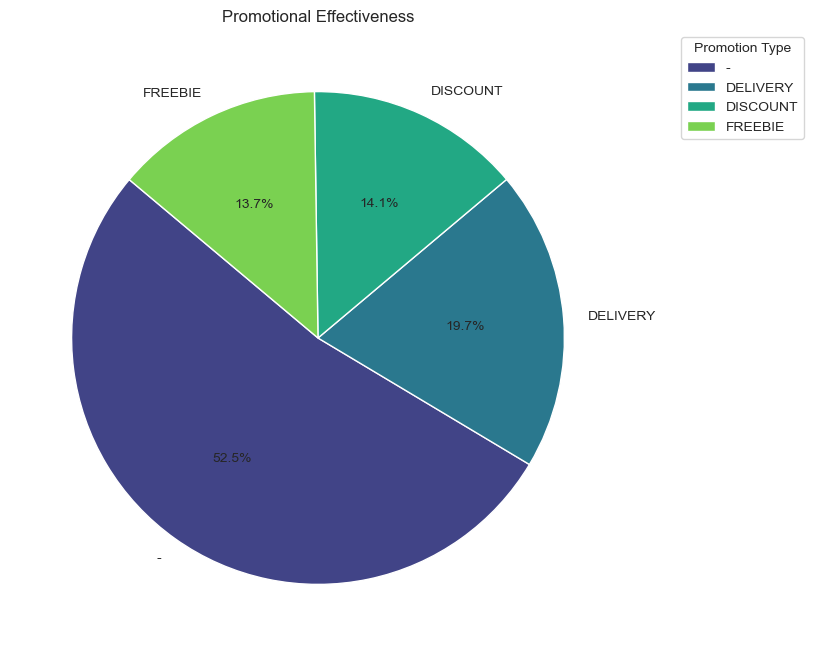

In [68]:
# Counting occurrences of each promotion type as a percentage
promo_counts = data['last_promo'].value_counts(normalize=True) * 100

# Plotting the promotional effectiveness as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(promo_counts.values, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(promo_counts)))

# Adding a legend
plt.legend(title="Promotion Type", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Promotional Effectiveness")
plt.show()

C:\Users\gonca\AppData\Local\Temp\ipykernel_27976\1633121917.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_preferences.index, x=payment_preferences.values, palette="Blues")


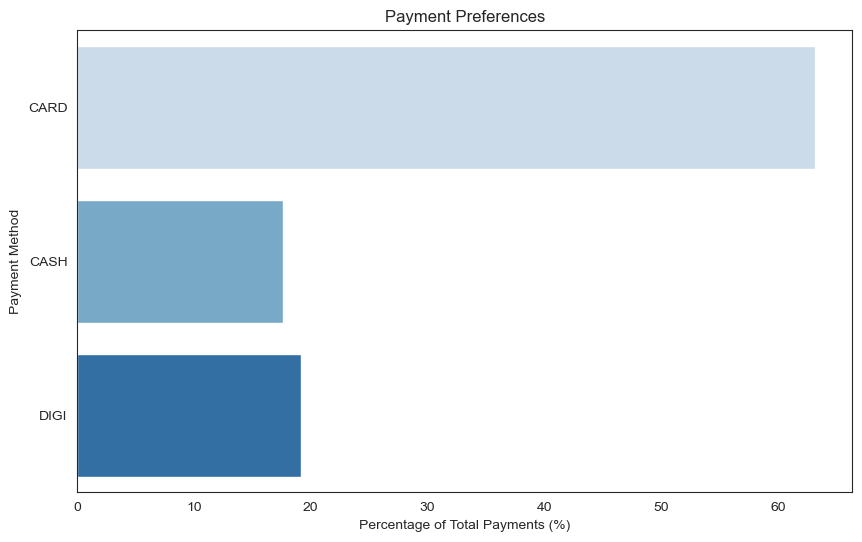

In [72]:
# Calculate the percentage of each payment method
payment_preferences = data['payment_method'].value_counts(normalize=True) * 100

# Plotting the payment preferences as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=payment_preferences.index, x=payment_preferences.values, palette="Blues")
plt.title("Payment Preferences")
plt.xlabel("Percentage of Total Payments (%)")
plt.ylabel("Payment Method")
plt.show()

**5.2. Analysis of Identified Patterns**

C:\Users\gonca\AppData\Local\Temp\ipykernel_27976\3067187756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_concentration.index, y=region_concentration.values, palette="coolwarm")


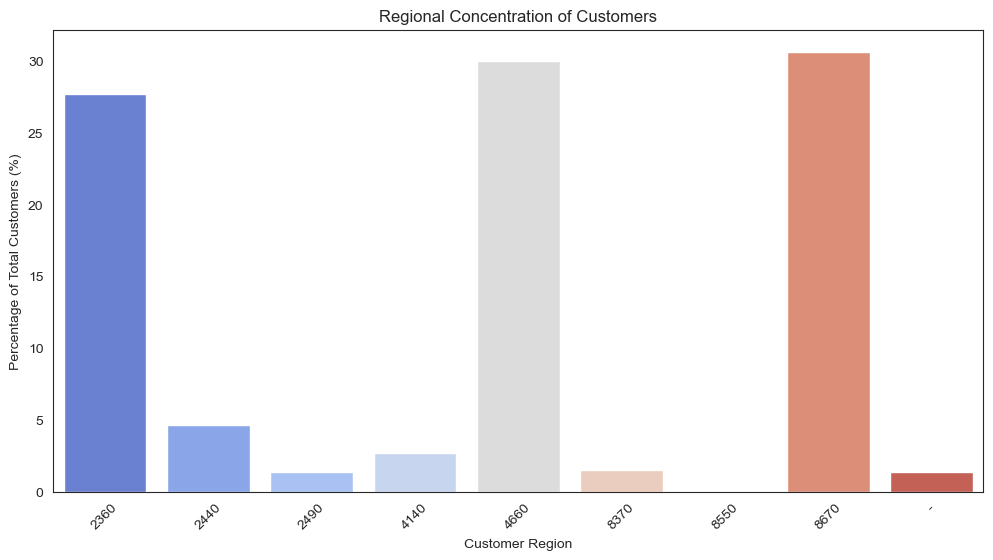

In [71]:
# Calculate the percentage of customers by region
region_concentration = data['customer_region'].value_counts(normalize=True) * 100

# Plotting the regional concentration as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=region_concentration.index, y=region_concentration.values, palette="coolwarm")
plt.title("Regional Concentration of Customers")
plt.xlabel("Customer Region")
plt.ylabel("Percentage of Total Customers (%)")
plt.xticks(rotation=45)
plt.show()

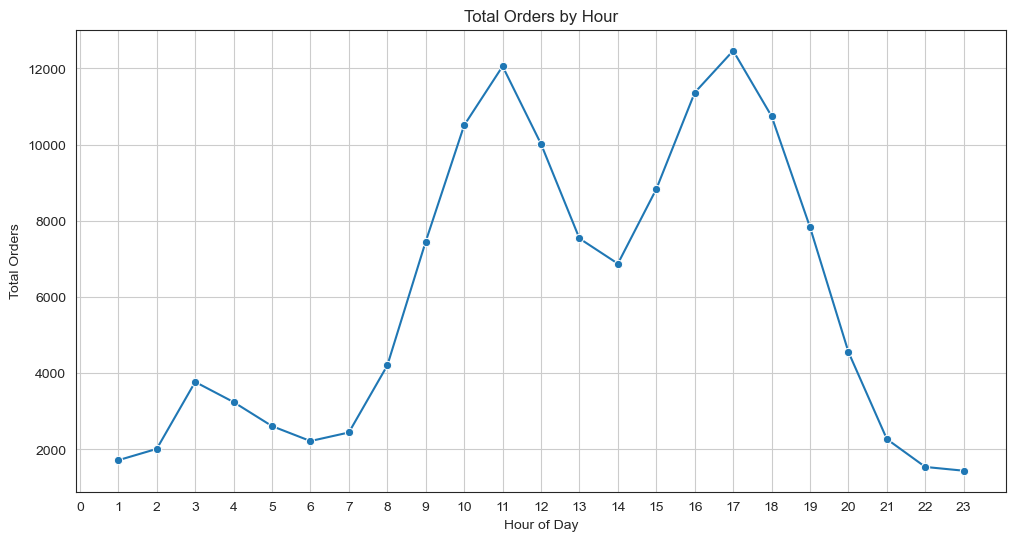

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of HR columns from HR_0 to HR_23
hr_vars = ['HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 
           'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
           'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 
           'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

# Sum orders by each hour
hourly_totals = data[hr_vars].sum()

# Plotting the hourly order totals to reveal peak times
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_totals.index.str.replace('HR_', '').astype(int), y=hourly_totals.values, marker='o')
plt.title("Total Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**5.3. Analysis of Identified Anomalies**

In [59]:
# Calculate percentage of undefined regions
undefined_region_percentage = (data['customer_region'] == "-").mean() * 100
print("\nUndefined Region Data (%):", undefined_region_percentage)


Undefined Region Data (%): 1.3866666666666667


In [76]:
# Detect outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Outlier detection based on IQR
outliers = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)][col]

# Print outliers
print("\nOutliers Detected:\n")
for col, values in outliers.items():
    if not values.empty:
        print(f"{col} Outliers:\n{values.describe()}\n")


Outliers Detected:

customer_age Outliers:
count    1083.000000
mean       50.064635
std         6.596607
min        44.000000
25%        45.000000
50%        48.000000
75%        53.000000
max        80.000000
Name: customer_age, dtype: float64

vendor_count Outliers:
count    1523.000000
mean       12.118188
std         3.944317
min         9.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        41.000000
Name: vendor_count, dtype: float64

product_count Outliers:
count    2370.000000
mean       24.193249
std        12.699526
min        15.000000
25%        17.000000
50%        20.000000
75%        27.000000
max       269.000000
Name: product_count, dtype: float64

is_chain Outliers:
count    3154.000000
mean       11.799620
std         6.898415
min         7.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        83.000000
Name: is_chain, dtype: float64

CUI_American Outliers:
count    3507.000000
mean       30.305007
std        2